In [6]:
!pip install kagglehub[pandas-datasets]

In [7]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
PyTorch version: 2.6.0+cu124
GPU available: []


In [8]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Eğer dosya adında boşluk varsa da çalışır
df = pd.read_csv("/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv", sep=";")
print(df.head())

  student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0                          S001,8.0,8.8,72.1,45,30.2                                
1                          S002,1.3,8.6,60.7,55,25.0                                
2                          S003,4.0,8.2,73.7,86,35.8                                
3                          S004,3.5,4.8,95.1,66,34.0                                
4                          S005,9.1,6.4,89.8,71,40.3                                


In [9]:
print(df.columns)

Index(['student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score'], dtype='object')


In [10]:
# ı'll use only two veriables for this work and those will be hours for study and exam scores
# Dosyayı satır satır oku # I got help from CHATCPT 
with open("/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv", "r") as f:
    lines = f.readlines()

# İlk satır: başlık
columns = lines[0].strip().split(",")

# Diğer satırlar: veriler
data = [line.strip().split(",") for line in lines[1:]]

# DataFrame oluştur
df = pd.DataFrame(data, columns=columns)

# Gerekirse sayısal sütunları float'a çevir
df["hours_studied"] = df["hours_studied"].astype(float)
df["exam_score"] = df["exam_score"].astype(float)

# I'll work with those two veriables 
df_subset = df[["hours_studied", "exam_score"]]

# Only 20 scores are enough for me
print(df_subset.head(20))


    hours_studied  exam_score
0             8.0        30.2
1             1.3        25.0
2             4.0        35.8
3             3.5        34.0
4             9.1        40.3
5             8.4        35.7
6            10.8        37.9
7             2.0        18.3
8             5.6        34.7
9             1.3        24.7
10            3.4        29.3
11            6.6        35.1
12            1.3        31.2
13            3.2        30.2
14            8.1        41.1
15            7.0        34.1
16            3.4        28.9
17            7.5        36.3
18            9.9        35.6
19            1.1        17.1


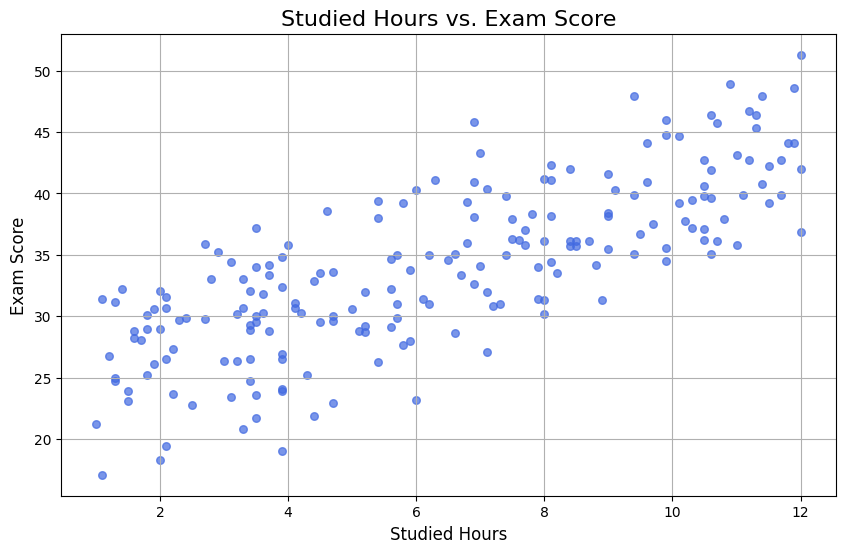

In [11]:
import matplotlib.pyplot as plt

# Grafik boyutu
plt.figure(figsize=(10, 6))

# Dağılım grafiği
plt.scatter(df_subset["hours_studied"], df_subset["exam_score"], color='royalblue', s=30, alpha=0.7)

# Başlık ve etiketler
plt.title("Studied Hours vs. Exam Score", fontsize=16)
plt.xlabel("Studied Hours", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)

# Izgara
plt.grid(True)

# Göster
plt.show()

In [12]:
import pandas as pd
import numpy as np
from tensorflow import keras
with open("/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv", "r") as f:
    lines = f.readlines()

columns = lines[0].strip().split(",")
data = [line.strip().split(",") for line in lines[1:]]

df = pd.DataFrame(data, columns=columns)
df["hours_studied"] = df["hours_studied"].astype(float)
df["exam_score"] = df["exam_score"].astype(float)

df_subset = df[["hours_studied", "exam_score"]].head(20)

# Girdi ve hedef değişkenler
X = df_subset[["hours_studied"]].values  # input shape (20,1)
y = df_subset["exam_score"].values       # hedef (20,)

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [4, 8, 16]

results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = keras.Sequential([
            keras.layers.Dense(10, activation='relu', input_shape=(1,)),
            keras.layers.Dense(1)  # regression için linear output
        ])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                      loss='mean_squared_error',
                      metrics=['mean_absolute_error'])

        history = model.fit(X, y, epochs=50, batch_size=batch_size, verbose=0, validation_split=0.2)

        val_mae = history.history['val_mean_absolute_error'][-1]
        results[f'lr_{lr}_bs_{batch_size}'] = val_mae

print("Hiperparametre sonuçları (validation MAE):")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hiperparametre sonuçları (validation MAE):
lr_0.001_bs_4: 30.2393
lr_0.001_bs_8: 27.0256
lr_0.001_bs_16: 30.0151
lr_0.01_bs_4: 7.0766
lr_0.01_bs_8: 7.9914
lr_0.01_bs_16: 20.9807
lr_0.1_bs_4: 3.7873
lr_0.1_bs_8: 3.1773
lr_0.1_bs_16: 5.1505


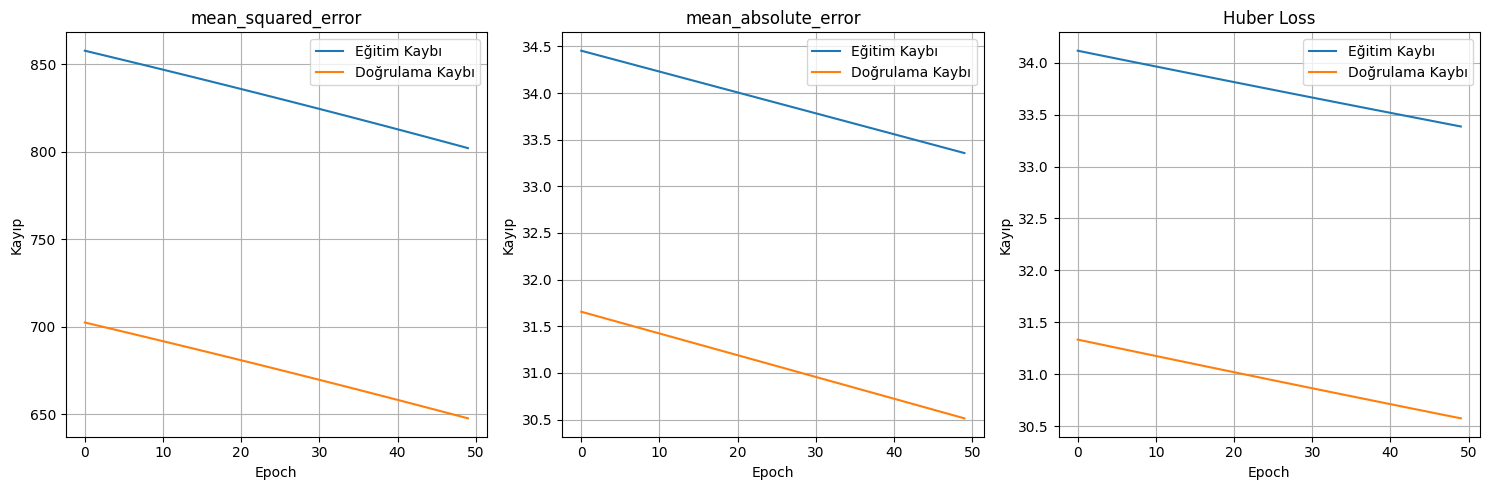

In [15]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

loss_functions = ['mean_squared_error', 'mean_absolute_error', tf.keras.losses.Huber()]

plt.figure(figsize=(15, 5))

for i, loss_func in enumerate(loss_functions, 1):
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                  loss=loss_func,
                  metrics=['mean_absolute_error'])

    history = model.fit(X, y, epochs=50, verbose=0, validation_split=0.2)

    plt.subplot(1, 3, i)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.title(loss_func if isinstance(loss_func, str) else 'Huber Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
# CNN
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# READ CSV
df = pd.read_csv("/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv")
df["hours_studied"] = df["hours_studied"].astype(float)
df["exam_score"] = df["exam_score"].astype(float)

# Giriş (X) ve hedef (y) değişkenleri seç
X = df[["hours_studied"]].values
y = df["exam_score"].values

# Veriyi eğitim ve test setlerine ayır (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1)  # Regresyon çıktısı
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


model.summary()
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=1)


test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Test Ort. Mutlak Hata (MAE): {test_mae:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1198.9567 - mean_absolute_error: 34.0847 - val_loss: 1214.8459 - val_mean_absolute_error: 34.2399
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1175.1646 - mean_absolute_error: 33.7104 - val_loss: 1179.1484 - val_mean_absolute_error: 33.7680
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1138.8618 - mean_absolute_error: 33.2177 - val_loss: 1135.0867 - val_mean_absolute_error: 33.1103
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1030.1691 - mean_absolute_error: 31.6159 - val_loss: 1060.5444 - val_mean_absolute_error: 31.9977
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 961.7788 - mean_absolute_error: 30.4417 - val_loss: 962.3807 - val_mean_absolute_error: 30.4151
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 937.6086 - mean_absolute_error: 30.0676 - val_loss: 848.0381 - val_mean_absolute_error: 28.4665
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71

In [23]:
# pytorch and transformer 
import torch
import torch.nn as nn

model = nn.Transformer(
    d_model=64,         # embedding boyutu
    nhead=4,            # çoklu başlık sayısı
    num_encoder_layers=2,
    num_decoder_layers=2
)

src = torch.rand((10, 32, 64))  # kaynak cümle: 10 token, 32 batch, 64 boyut
tgt = torch.rand((5, 32, 64))   # hedef cümle: 5 token

out = model(src, tgt)
print("Çıkış boyutu:", out.shape)  # (5, 32, 64)

Çıkış boyutu: torch.Size([5, 32, 64])



Adam optimizer ile eğitim...
Adam Test MAE (Ort. Mutlak Hata): 5.1220

RMSprop optimizer ile eğitim...
RMSprop Test MAE (Ort. Mutlak Hata): 4.5535

SGD optimizer ile eğitim...
SGD Test MAE (Ort. Mutlak Hata): 6.1022


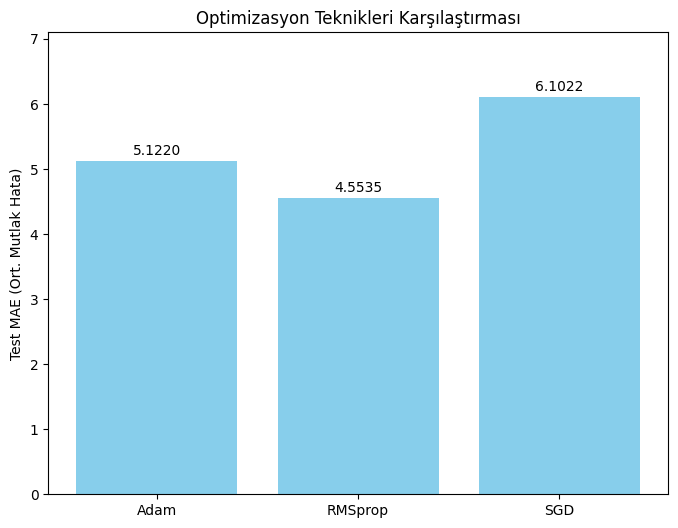

In [24]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Model oluşturma fonksiyonu
def create_regression_model():
    model = keras.Sequential([
        layers.Dense(64, activation='tanh', input_shape=(1,)),
        layers.Dense(32, activation='tanh'),
        layers.Dense(1)  # Regresyon çıktısı
    ])
    return model

# Farklı optimizer'lar
optimizers = {
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\n{opt_name} optimizer ile eğitim...")

    model = create_regression_model()
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=8,
                        validation_split=0.2,
                        verbose=0)

    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    results[opt_name] = test_mae
    print(f"{opt_name} Test MAE (Ort. Mutlak Hata): {test_mae:.4f}")

# Sonuçları çizdirme
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Optimizasyon Teknikleri Karşılaştırması')
plt.ylabel('Test MAE (Ort. Mutlak Hata)')
plt.ylim(0, max(results.values()) + 1)

for bar, mae in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{mae:.4f}', ha='center', va='bottom')

plt.show()


In [26]:
print("=" * 50)
print("ÖĞRENCİ SINAV SKORU TAHMİN PROJESİ - SONUÇLAR")
print("=" * 50)
print(f"Temel Regresyon Model MAE: {test_mae:.4f}")
print("Transfer Learning benzeri model kullanılmadı.")  # veya varsa onun skorunu da ekle

# En düşük MAE'yi bulan optimizer
best_optimizer = min(results, key=results.get)
best_mae = results[best_optimizer]

print(f"En iyi optimizer: {best_optimizer} (MAE: {best_mae:.4f})")
print("=" * 50)


ÖĞRENCİ SINAV SKORU TAHMİN PROJESİ - SONUÇLAR
Temel Regresyon Model MAE: 6.1022
Transfer Learning benzeri model kullanılmadı.
En iyi optimizer: RMSprop (MAE: 4.5535)
